# Preset for Empirical Analysis

In [2]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
english = pd.read_csv("/drive/data/dict_en.csv")
spanish = pd.read_csv("/drive/data/dict_es.csv")
russian = pd.read_csv("/drive/data/dict_ru.csv")

# English Corpus Analysis

### 1'st Zipf's Law

In [4]:
rank = np.array(range(1, len(english)+1))
frequency = np.array(english['Frequency'])/np.array(english['Frequency']).sum()

zipf_const = np.array([rank[i] * frequency[i] for i in range (0, len(english))]).mean()
print("Zipf's Constant:", zipf_const)

emp_mean =  np.array([zipf_const/rank[i] for i in range (0, len(english))]).sum()
emp_mse = (np.array([(zipf_const/rank[i] - emp_mean)**2 for i in range (0, len(english))]).sum()) ** (0.5) 
error = (len(english)**0.5 * (np.array([frequency[i] - zipf_const/rank[i] for i in range (0, len(english))])).sum() / emp_mse)
print("Error statistics:", error)

Zipf's Constant: 0.03503078880066083
Error statistics: 1.5918284237414375


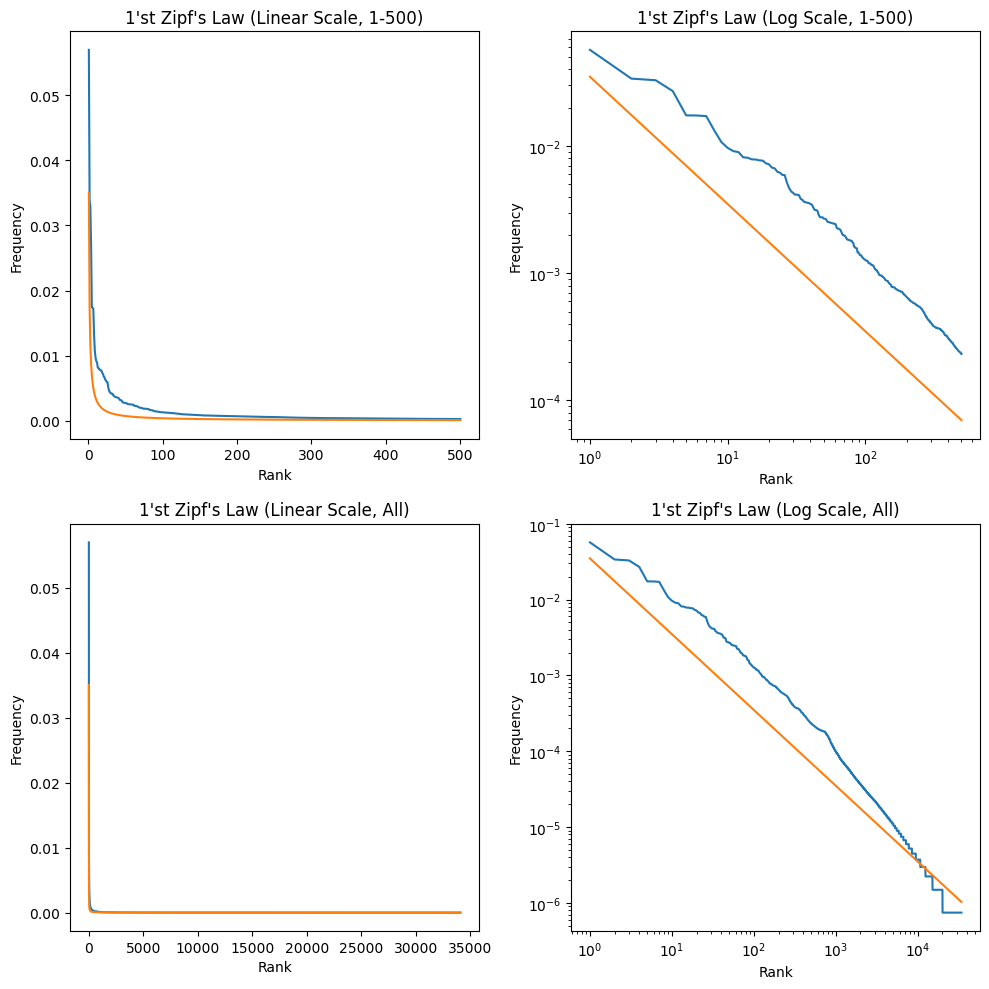

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

rank = np.array(range(1, 501))
frequency = np.array(english['Frequency'][:500])/np.array(english['Frequency']).sum()
ax1.plot(rank, frequency)
ax1.plot(rank, [zipf_const/rank[i] for i in range (0,500)])
ax1.set_xlabel("Rank")
ax1.set_ylabel("Frequency")
ax1.set_title("1'st Zipf's Law (Linear Scale, 1-500)")
ax2.loglog(rank, frequency)
ax2.loglog(rank, [zipf_const/rank[i] for i in range (0,500)])
ax2.set_xlabel("Rank")
ax2.set_ylabel("Frequency")
ax2.set_title("1'st Zipf's Law (Log Scale, 1-500)")

rank = np.array(range(1, len(english)+1))
frequency = np.array(english['Frequency'])/np.array(english['Frequency']).sum()
ax3.plot(rank, frequency)
ax3.plot(rank, [zipf_const/rank[i] for i in range (0,len(english))])
ax3.set_xlabel("Rank")
ax3.set_ylabel("Frequency")
ax3.set_title("1'st Zipf's Law (Linear Scale, All)")
ax4.loglog(rank, frequency)
ax4.loglog(rank, [zipf_const/rank[i] for i in range (0,len(english))])
ax4.set_xlabel("Rank")
ax4.set_ylabel("Frequency")
ax4.set_title("1'st Zipf's Law (Log Scale, All)")

plt.tight_layout()
plt.show()

### 3'rd Zipf's Law

In [6]:
auxiliary_PoS = english.iloc[[0,1,2,3,4,5,6,7,8,12,13,15,18,19,21,24,25,29,30,31,32,38,42,43,46,48,51,54,55,57,59,61,67,68,69,76,78,81,82,84,85,86,89,92,93,94,96,97,98,101,103,106,114,115,120,127,129,133,134,135,137,138,140,141,142,148,150,152,156,165,166,169,171,180,182,186,192,193,197,198]]
rank = np.array([len(word) for word in auxiliary_PoS['Word']])
frequency = np.array(auxiliary_PoS['Frequency'])/np.array(auxiliary_PoS['Frequency']).sum()

zipf_const = np.array([rank[i] * frequency[i] for i in range (0, len(auxiliary_PoS))]).mean()
print("Zipf's Constant:", zipf_const)

emp_mean =  np.array([zipf_const/rank[i] for i in range (0, len(auxiliary_PoS))]).sum()
emp_mse = (np.array([(zipf_const/rank[i] - emp_mean)**2 for i in range (0, len(auxiliary_PoS))]).sum()) ** (0.5) 
error = (len(auxiliary_PoS)**0.5 * (np.array([frequency[i] - zipf_const/rank[i] for i in range (0, len(auxiliary_PoS))])).sum() / emp_mse)
print("Error statistics:", error)

Zipf's Constant: 0.03689075464014622
Error statistics: 0.13695109011093615


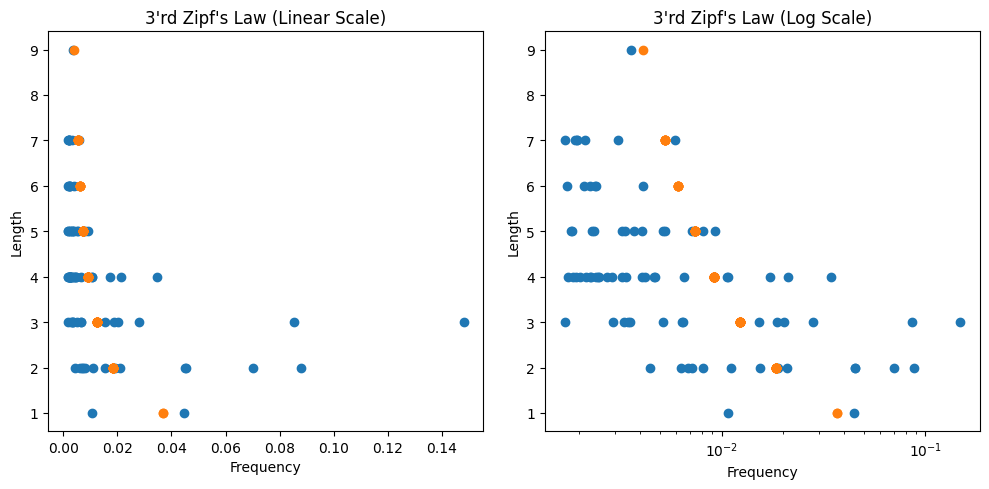

In [7]:
auxiliary_PoS = english.iloc[[0,1,2,3,4,5,6,7,8,12,13,15,18,19,21,24,25,29,30,31,32,38,42,43,46,48,51,54,55,57,59,61,67,68,69,76,78,81,82,84,85,86,89,92,93,94,96,97,98,101,103,106,114,115,120,127,129,133,134,135,137,138,140,141,142,148,150,152,156,165,166,169,171,180,182,186,192,193,197,198]]
rank = np.array([len(word) for word in auxiliary_PoS['Word']])
frequency = np.array(auxiliary_PoS['Frequency'])/np.array(auxiliary_PoS['Frequency']).sum()

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

rank = np.array([len(word) for word in auxiliary_PoS['Word']])
frequency = np.array(auxiliary_PoS['Frequency'])/np.array(auxiliary_PoS['Frequency']).sum()
ax1.scatter(frequency, rank)
ax1.scatter([zipf_const/rank[i] for i in range (0,len(auxiliary_PoS))], rank)
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Length")
ax1.set_title("3'rd Zipf's Law (Linear Scale)")
ax2.scatter(frequency, rank)
ax2.scatter([zipf_const/rank[i] for i in range (0,len(auxiliary_PoS))], rank)
ax2.set_xscale('log')
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Length")
ax2.set_title("3'rd Zipf's Law (Log Scale)")

plt.tight_layout()
plt.show()


### Juilland’s D Coefficient

In [8]:
chunk_count = 5
word_count = 60

with open('/drive/data/text_en.txt', 'r', encoding='utf-8') as file:
    text = file.read()
text = text.lower()
text = re.sub(r'[^a-z\'-]', ' ', text)
words = text.split()
chunk_length = len(words) // chunk_count
data = {}
data['word'] = np.array(english['Word'][:word_count])
for i in range (0, chunk_count):
    chunk = words[chunk_length*i:chunk_length*(i+1)]
    chunk_entry = {}
    for word in english['Word'][:word_count]:
        chunk_entry[word]=Counter(chunk)[word]
    data['frequency_'+str(i+1)]=chunk_entry.values()
dataframe = pd.DataFrame(data)
for i in range (0, chunk_count):
    dataframe['frequency_'+str(i+1)]/=chunk_length

dataframe['frequency_mean']=dataframe[['frequency_'+str(i+1) for i in range (0, chunk_count)]].mean(axis=1)
dataframe['frequency_variance']=dataframe[['frequency_'+str(i+1) for i in range (0, chunk_count)]].std(axis=1)
dataframe['coefficient_D']=100*(1-dataframe['frequency_variance']/(dataframe['frequency_mean']*((chunk_count-1)**0.5)))
dataframe

,word,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_mean,frequency_variance,coefficient_D
0,the,0.065837,0.056878,0.062846,0.050164,0.049365,0.057018,0.007370,93.536880
1,of,0.042324,0.037137,0.034005,0.031753,0.024129,0.033870,0.006737,90.054954
2,and,0.028896,0.028019,0.034927,0.037085,0.035581,0.032902,0.004143,93.703792
3,to,0.027774,0.026492,0.023988,0.027729,0.029052,0.027007,0.001915,96.454092
4,in,0.017538,0.016323,0.017928,0.018727,0.016594,0.017422,0.000983,97.178634
5,or,0.042655,0.034614,0.004522,0.003311,0.001754,0.017371,0.019643,43.462260
6,a,0.014026,0.014639,0.023341,0.016962,0.016906,0.017175,0.003691,89.255601
7,that,0.012005,0.012403,0.011050,0.015390,0.015505,0.013271,0.002048,92.285299
8,for,0.014112,0.013083,0.009423,0.009341,0.007870,0.010766,0.002683,87.540879
9,you,0.013476,0.015256,0.005228,0.005165,0.009226,0.009670,0.004635,76.035999


# Spanish Corpus Analysis

### 1'st Zipf's Law

In [9]:
rank = np.array(range(1, len(spanish)+1))
frequency = np.array(spanish['Frequency'])/np.array(english['Frequency']).sum()

zipf_const = np.array([rank[i] * frequency[i] for i in range (0, len(spanish))]).mean()
print("Zipf's Constant:", zipf_const)

emp_mean =  np.array([zipf_const/rank[i] for i in range (0, len(spanish))]).sum()
emp_mse = (np.array([(zipf_const/rank[i] - emp_mean)**2 for i in range (0, len(spanish))]).sum()) ** (0.5) 
error = (len(spanish)**0.5 * (np.array([frequency[i] - zipf_const/rank[i] for i in range (0, len(spanish))])).sum() / emp_mse)
print("Error statistics:", error)

Zipf's Constant: 0.0818724756607452
Error statistics: 0.2767513536672953


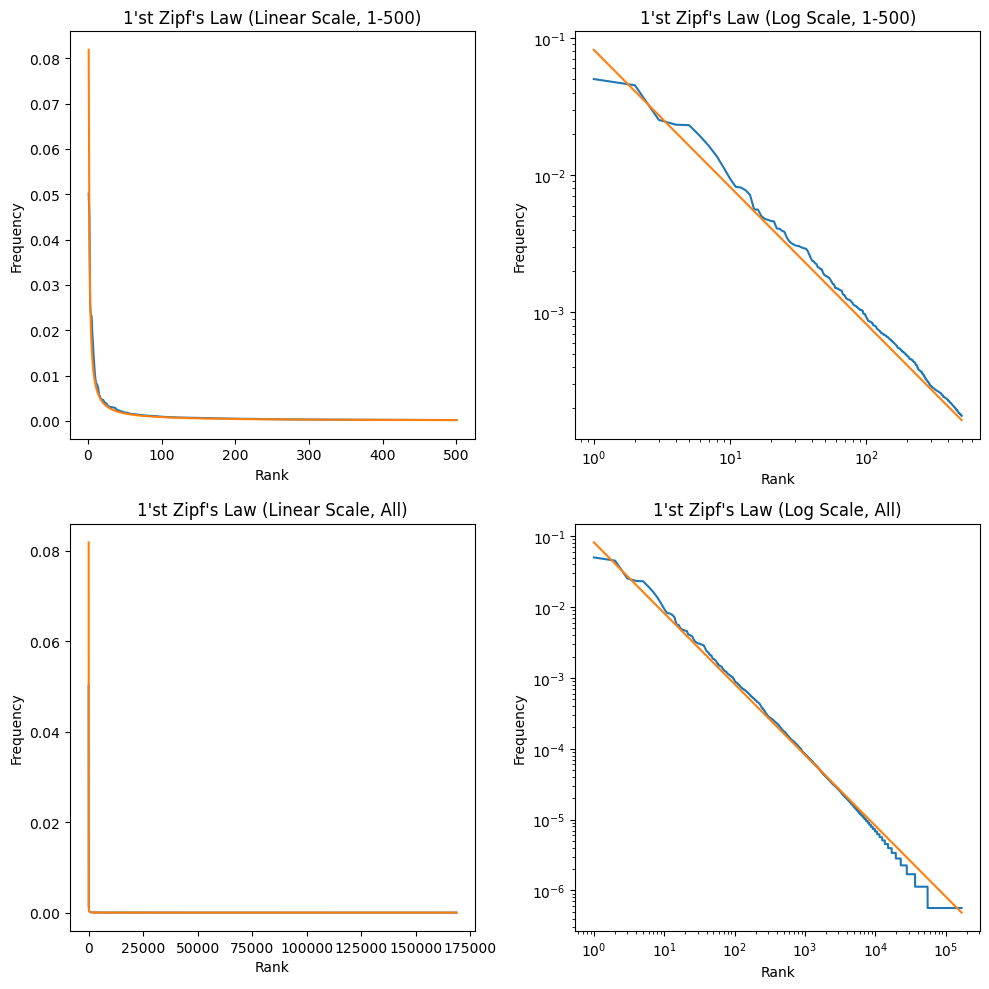

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

rank = np.array(range(1, 501))
frequency = np.array(spanish['Frequency'][:500])/np.array(spanish['Frequency']).sum()
ax1.plot(rank, frequency)
ax1.plot(rank, [zipf_const/rank[i] for i in range (0,500)])
ax1.set_xlabel("Rank")
ax1.set_ylabel("Frequency")
ax1.set_title("1'st Zipf's Law (Linear Scale, 1-500)")
ax2.loglog(rank, frequency)
ax2.loglog(rank, [zipf_const/rank[i] for i in range (0,500)])
ax2.set_xlabel("Rank")
ax2.set_ylabel("Frequency")
ax2.set_title("1'st Zipf's Law (Log Scale, 1-500)")

rank = np.array(range(1, len(spanish)+1))
frequency = np.array(spanish['Frequency'])/np.array(spanish['Frequency']).sum()
ax3.plot(rank, frequency)
ax3.plot(rank, [zipf_const/rank[i] for i in range (0,len(spanish))])
ax3.set_xlabel("Rank")
ax3.set_ylabel("Frequency")
ax3.set_title("1'st Zipf's Law (Linear Scale, All)")
ax4.loglog(rank, frequency)
ax4.loglog(rank, [zipf_const/rank[i] for i in range (0,len(spanish))])
ax4.set_xlabel("Rank")
ax4.set_ylabel("Frequency")
ax4.set_title("1'st Zipf's Law (Log Scale, All)")

plt.tight_layout()
plt.show()

### 3'rd Zipf's Law

In [11]:
auxiliary_PoS = spanish.iloc[[0,1,2,3,4,5,6,8,8,9,10,11,12,13,16,17,18,19,20,21,22,27,28,29,32,34,36,37,38,40,41,45,46,47,52,55,56,60,73,75,76,77,79,80,81,84,85,86,91,90,92,94,98,99,100,106,110,111,114,116,119,120,121,124,128,131,134,142,146,147,153,155,158,159,163,167,173,174,176,181,186,187]]
rank = np.array([len(word) for word in auxiliary_PoS['Word']])
frequency = np.array(auxiliary_PoS['Frequency'])/np.array(auxiliary_PoS['Frequency']).sum()

zipf_const = np.array([rank[i] * frequency[i] for i in range (0, len(auxiliary_PoS))]).mean()
print("Zipf's Constant:", zipf_const)

emp_mean =  np.array([zipf_const/rank[i] for i in range (0, len(auxiliary_PoS))]).sum()
emp_mse = (np.array([(zipf_const/rank[i] - emp_mean)**2 for i in range (0, len(auxiliary_PoS))]).sum()) ** (0.5) 
error = (len(auxiliary_PoS)**0.5 * (np.array([frequency[i] - zipf_const/rank[i] for i in range (0, len(auxiliary_PoS))])).sum() / emp_mse)
print("Error statistics:", error)

Zipf's Constant: 0.028696425536694374
Error statistics: 0.07443550495933408


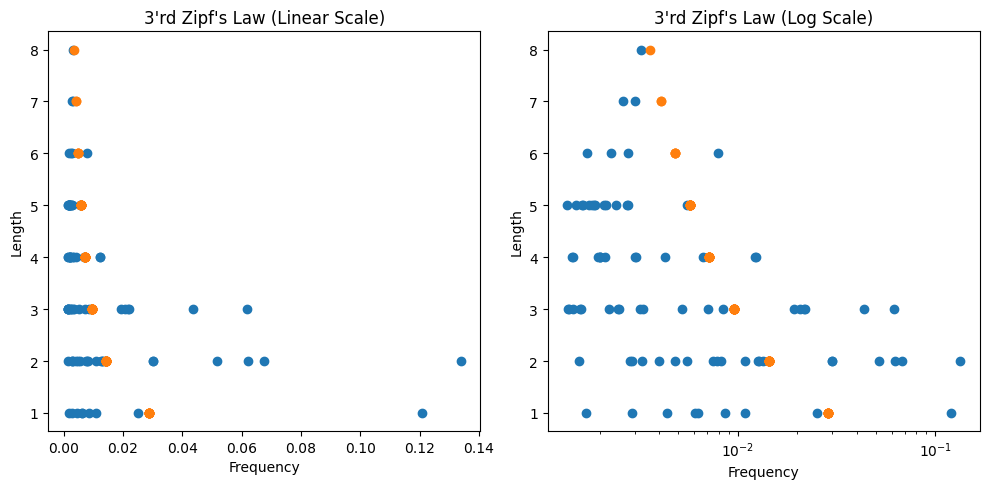

In [12]:
auxiliary_PoS = spanish.iloc[[0,1,2,3,4,5,6,8,8,9,10,11,12,13,16,17,18,19,20,21,22,27,28,29,32,34,36,37,38,40,41,45,46,47,52,55,56,60,73,75,76,77,79,80,81,84,85,86,91,90,92,94,98,99,100,106,110,111,114,116,119,120,121,124,128,131,134,142,146,147,153,155,158,159,163,167,173,174,176,181,186,187]]
rank = np.array([len(word) for word in auxiliary_PoS['Word']])
frequency = np.array(auxiliary_PoS['Frequency'])/np.array(auxiliary_PoS['Frequency']).sum()

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

rank = np.array([len(word) for word in auxiliary_PoS['Word']])
frequency = np.array(auxiliary_PoS['Frequency'])/np.array(auxiliary_PoS['Frequency']).sum()
ax1.scatter(frequency, rank)
ax1.scatter([zipf_const/rank[i] for i in range (0,len(auxiliary_PoS))], rank)
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Length")
ax1.set_title("3'rd Zipf's Law (Linear Scale)")
ax2.scatter(frequency, rank)
ax2.scatter([zipf_const/rank[i] for i in range (0,len(auxiliary_PoS))], rank)
ax2.set_xscale('log')
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Length")
ax2.set_title("3'rd Zipf's Law (Log Scale)")

plt.tight_layout()
plt.show()

### Juilland’s D Coefficient

In [13]:
chunk_count = 5
word_count = 60

with open('/drive/data/text_en.txt', 'r', encoding='utf-8') as file:
    text = file.read()
text = text.lower()
text = re.sub(r'[^a-z\'-]', ' ', text)
words = text.split()
chunk_length = len(words) // chunk_count
data = {}
data['word'] = np.array(spanish['Word'][:word_count])
for i in range (0, chunk_count):
    chunk = words[chunk_length*i:chunk_length*(i+1)]
    chunk_entry = {}
    for word in english['Word'][:word_count]:
        chunk_entry[word]=Counter(chunk)[word]
    data['frequency_'+str(i+1)]=chunk_entry.values()
dataframe = pd.DataFrame(data)
for i in range (0, chunk_count):
    dataframe['frequency_'+str(i+1)]/=chunk_length

dataframe['frequency_mean']=dataframe[['frequency_'+str(i+1) for i in range (0, chunk_count)]].mean(axis=1)
dataframe['frequency_variance']=dataframe[['frequency_'+str(i+1) for i in range (0, chunk_count)]].std(axis=1)
dataframe['coefficient_D']=100*(1-dataframe['frequency_variance']/(dataframe['frequency_mean']*((chunk_count-1)**0.5)))
dataframe

,word,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_mean,frequency_variance,coefficient_D
0,de,0.065837,0.056878,0.062846,0.050164,0.049365,0.057018,0.007370,93.536880
1,y,0.042324,0.037137,0.034005,0.031753,0.024129,0.033870,0.006737,90.054954
2,la,0.028896,0.028019,0.034927,0.037085,0.035581,0.032902,0.004143,93.703792
3,el,0.027774,0.026492,0.023988,0.027729,0.029052,0.027007,0.001915,96.454092
4,que,0.017538,0.016323,0.017928,0.018727,0.016594,0.017422,0.000983,97.178634
5,en,0.042655,0.034614,0.004522,0.003311,0.001754,0.017371,0.019643,43.462260
6,los,0.014026,0.014639,0.023341,0.016962,0.016906,0.017175,0.003691,89.255601
7,a,0.012005,0.012403,0.011050,0.015390,0.015505,0.013271,0.002048,92.285299
8,no,0.014112,0.013083,0.009423,0.009341,0.007870,0.010766,0.002683,87.540879
9,á,0.013476,0.015256,0.005228,0.005165,0.009226,0.009670,0.004635,76.035999


# Russian Corpus Analysis

### 1'st Zipf's Law

In [14]:
rank = np.array(range(1, len(russian)+1))
frequency = np.array(russian['Frequency'])/np.array(english['Frequency']).sum()

zipf_const = np.array([rank[i] * frequency[i] for i in range (0, len(russian))]).mean()
print("Zipf's Constant:", zipf_const)

emp_mean =  np.array([zipf_const/rank[i] for i in range (0, len(russian))]).sum()
emp_mse = (np.array([(zipf_const/rank[i] - emp_mean)**2 for i in range (0, len(russian))]).sum()) ** (0.5) 
error = (len(russian)**0.5 * (np.array([frequency[i] - zipf_const/rank[i] for i in range (0, len(russian))])).sum() / emp_mse)
print("Error statistics:", error)

Zipf's Constant: 0.05457504075815508
Error statistics: 0.15448875969761316


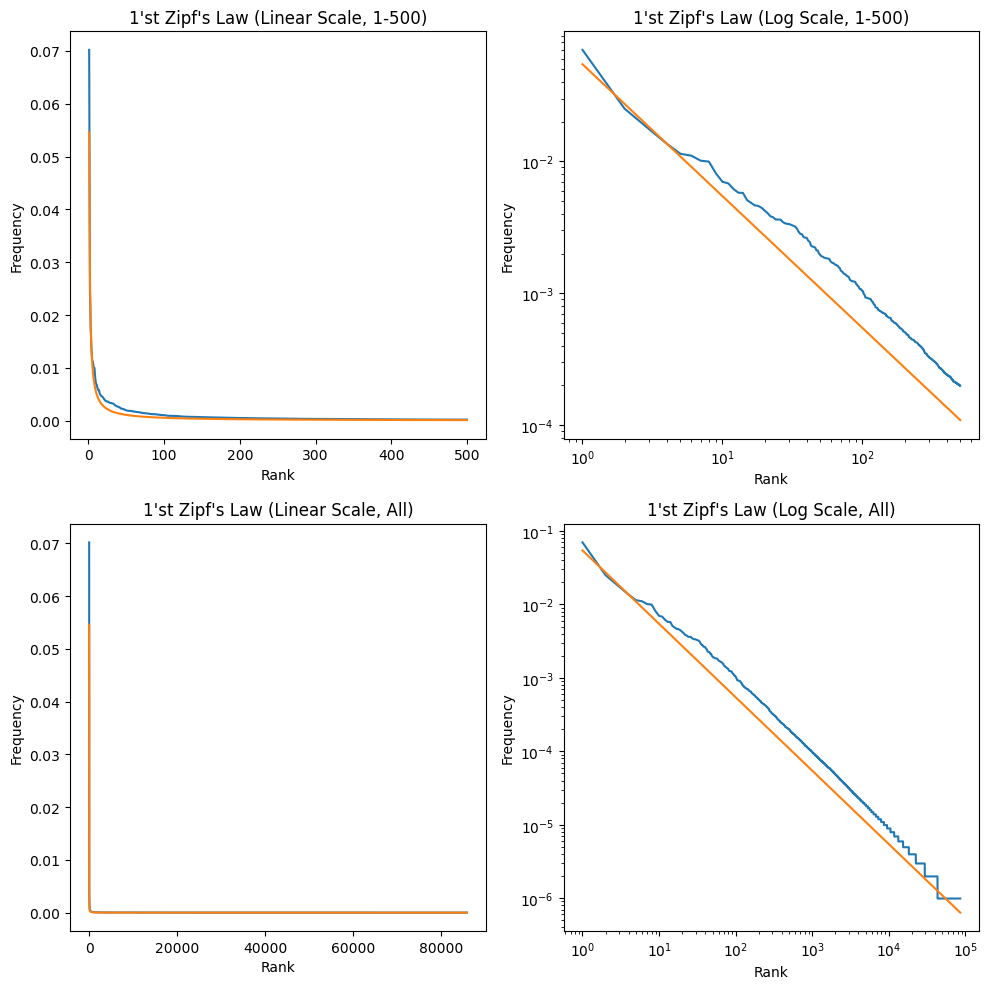

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

rank = np.array(range(1, 501))
frequency = np.array(russian['Frequency'][:500])/np.array(russian['Frequency']).sum()
ax1.plot(rank, frequency)
ax1.plot(rank, [zipf_const/rank[i] for i in range (0,500)])
ax1.set_xlabel("Rank")
ax1.set_ylabel("Frequency")
ax1.set_title("1'st Zipf's Law (Linear Scale, 1-500)")
ax2.loglog(rank, frequency)
ax2.loglog(rank, [zipf_const/rank[i] for i in range (0,500)])
ax2.set_xlabel("Rank")
ax2.set_ylabel("Frequency")
ax2.set_title("1'st Zipf's Law (Log Scale, 1-500)")

rank = np.array(range(1, len(russian)+1))
frequency = np.array(russian['Frequency'])/np.array(russian['Frequency']).sum()
ax3.plot(rank, frequency)
ax3.plot(rank, [zipf_const/rank[i] for i in range (0,len(russian))])
ax3.set_xlabel("Rank")
ax3.set_ylabel("Frequency")
ax3.set_title("1'st Zipf's Law (Linear Scale, All)")
ax4.loglog(rank, frequency)
ax4.loglog(rank, [zipf_const/rank[i] for i in range (0,len(russian))])
ax4.set_xlabel("Rank")
ax4.set_ylabel("Frequency")
ax4.set_title("1'st Zipf's Law (Log Scale, All)")

plt.tight_layout()
plt.show()

### 3'rd Zipf's Law

In [16]:
auxiliary_PoS = russian.iloc[[0,1,2,3,5,6,9,10,11,13,14,16,17,18,21,22,23,25,26,27,28,29,30,31,33,41,46,47,51,52,53,54,55,56,61,62,63,65,66,69,77,78,81,87,88,89,91,97,98,99,103,107,117,119,123,126,128,135,140,142,147,152,153,159,160,162,164,168,169,170,171,172,178,185,187,188,194,196,199]]
rank = np.array([len(word) for word in auxiliary_PoS['Word']])
frequency = np.array(auxiliary_PoS['Frequency'])/np.array(auxiliary_PoS['Frequency']).sum()

zipf_const = np.array([rank[i] * frequency[i] for i in range (0, len(auxiliary_PoS))]).mean()
print("Zipf's Constant:", zipf_const)

emp_mean =  np.array([zipf_const/rank[i] for i in range (0, len(auxiliary_PoS))]).sum()
emp_mse = (np.array([(zipf_const/rank[i] - emp_mean)**2 for i in range (0, len(auxiliary_PoS))]).sum()) ** (0.5) 
error = (len(auxiliary_PoS)**0.5 * (np.array([frequency[i] - zipf_const/rank[i] for i in range (0, len(auxiliary_PoS))])).sum() / emp_mse)
print("Error statistics:", error)

Zipf's Constant: 0.02673893566693226
Error statistics: 0.2231443198231877


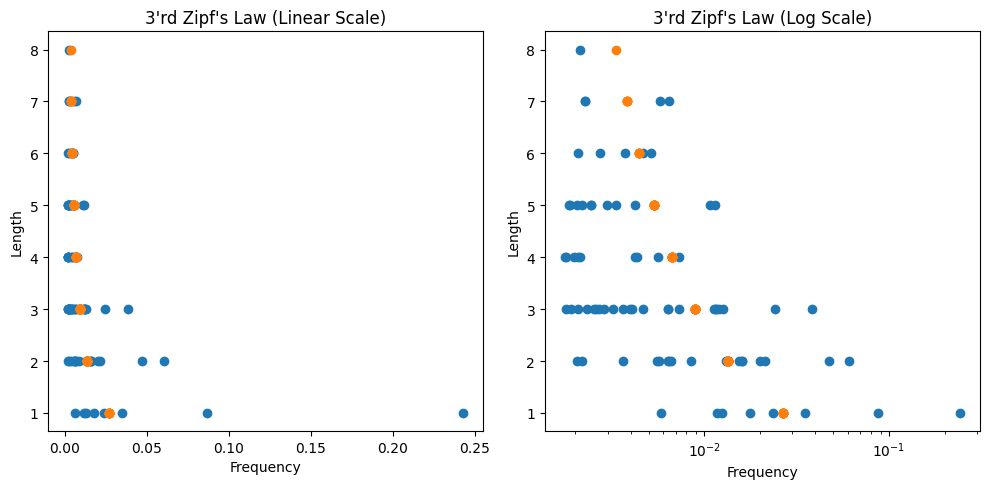

In [17]:
auxiliary_PoS = russian.iloc[[0,1,2,3,5,6,9,10,11,13,14,16,17,18,21,22,23,25,26,27,28,29,30,31,33,41,46,47,51,52,53,54,55,56,61,62,63,65,66,69,77,78,81,87,88,89,91,97,98,99,103,107,117,119,123,126,128,135,140,142,147,152,153,159,160,162,164,168,169,170,171,172,178,185,187,188,194,196,199]]
rank = np.array([len(word) for word in auxiliary_PoS['Word']])
frequency = np.array(auxiliary_PoS['Frequency'])/np.array(auxiliary_PoS['Frequency']).sum()

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

rank = np.array([len(word) for word in auxiliary_PoS['Word']])
frequency = np.array(auxiliary_PoS['Frequency'])/np.array(auxiliary_PoS['Frequency']).sum()
ax1.scatter(frequency, rank)
ax1.scatter([zipf_const/rank[i] for i in range (0,len(auxiliary_PoS))], rank)
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Length")
ax1.set_title("3'rd Zipf's Law (Linear Scale)")
ax2.scatter(frequency, rank)
ax2.scatter([zipf_const/rank[i] for i in range (0,len(auxiliary_PoS))], rank)
ax2.set_xscale('log')
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Length")
ax2.set_title("3'rd Zipf's Law (Log Scale)")

plt.tight_layout()
plt.show()

### Juilland’s D Coefficient

In [18]:
chunk_count = 5
word_count = 60

with open('/drive/data/text_en.txt', 'r', encoding='utf-8') as file:
    text = file.read()
text = text.lower()
text = re.sub(r'[^a-z\'-]', ' ', text)
words = text.split()
chunk_length = len(words) // chunk_count
data = {}
data['word'] = np.array(russian['Word'][:word_count])
for i in range (0, chunk_count):
    chunk = words[chunk_length*i:chunk_length*(i+1)]
    chunk_entry = {}
    for word in english['Word'][:word_count]:
        chunk_entry[word]=Counter(chunk)[word]
    data['frequency_'+str(i+1)]=chunk_entry.values()
dataframe = pd.DataFrame(data)
for i in range (0, chunk_count):
    dataframe['frequency_'+str(i+1)]/=chunk_length

dataframe['frequency_mean']=dataframe[['frequency_'+str(i+1) for i in range (0, chunk_count)]].mean(axis=1)
dataframe['frequency_variance']=dataframe[['frequency_'+str(i+1) for i in range (0, chunk_count)]].std(axis=1)
dataframe['coefficient_D']=100*(1-dataframe['frequency_variance']/(dataframe['frequency_mean']*((chunk_count-1)**0.5)))
dataframe

,word,frequency_1,frequency_2,frequency_3,frequency_4,frequency_5,frequency_mean,frequency_variance,coefficient_D
0,и,0.065837,0.056878,0.062846,0.050164,0.049365,0.057018,0.007370,93.536880
1,в,0.042324,0.037137,0.034005,0.031753,0.024129,0.033870,0.006737,90.054954
2,не,0.028896,0.028019,0.034927,0.037085,0.035581,0.032902,0.004143,93.703792
3,на,0.027774,0.026492,0.023988,0.027729,0.029052,0.027007,0.001915,96.454092
4,его,0.017538,0.016323,0.017928,0.018727,0.016594,0.017422,0.000983,97.178634
5,что,0.042655,0.034614,0.004522,0.003311,0.001754,0.017371,0.019643,43.462260
6,с,0.014026,0.014639,0.023341,0.016962,0.016906,0.017175,0.003691,89.255601
7,он,0.012005,0.012403,0.011050,0.015390,0.015505,0.013271,0.002048,92.285299
8,я,0.014112,0.013083,0.009423,0.009341,0.007870,0.010766,0.002683,87.540879
9,как,0.013476,0.015256,0.005228,0.005165,0.009226,0.009670,0.004635,76.035999
